In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import seaborn as sns

In [8]:
com=pd.read_csv("E:/SHRADDHA/DA-DS Assignments/DS Assignments/14.A_Decision Trees/Company_Data.csv")
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
com.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Text(0, 0.5, 'Sales')

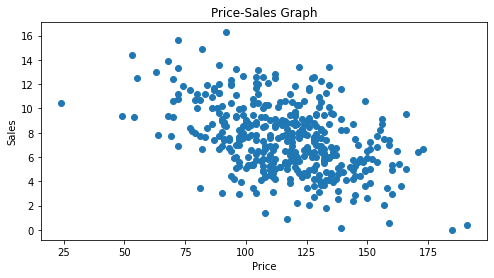

In [11]:
plt.figure(figsize=(8,4))
plt.scatter(x=com.Price, y=com.Sales)
plt.title("Price-Sales Graph")
plt.xlabel("Price")
plt.ylabel("Sales")

In [12]:
def rate_sales(x):
    if x >= 7:
        return 'High'
    else:
        return 'Low'

com['Sales'] = com.Sales.apply(rate_sales) 
com

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,High,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Low,139,23,3,37,120,Medium,55,11,No,Yes
397,High,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

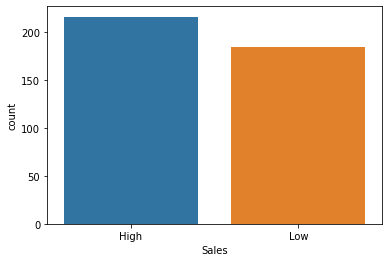

In [14]:
sns.countplot(com['Sales'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in com.columns:
    if com[column_name].dtype == object:
            com[column_name]  = le.fit_transform(com[column_name])
    else:
        pass

In [19]:
com.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0


In [20]:
x=com.iloc[:,1:]
y=com['Sales']

In [21]:
com1['Sales'].unique()

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15, 10.81,  6.63, 11.85,  6.54,
        4.69,  9.01, 11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29,
       13.91,  8.73,  6.41, 12.13,  5.08,  5.87, 10.14, 14.9 ,  8.33,
        5.27,  2.99,  7.81, 13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,
        8.89,  4.95,  6.59,  3.24,  2.07,  7.96, 10.43,  4.12,  4.16,
        4.56, 12.44,  4.38,  3.91, 10.61,  1.42,  4.42,  7.91,  6.92,
        4.9 ,  6.85, 11.91,  0.91,  5.42,  5.21,  8.32,  7.32,  1.82,
        8.47,  7.8 ,  8.85, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,
        8.55, 10.64,  7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  2.23,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.88,  4.11,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,  9.31,
        8.54,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,  8.19,  8.87,
        9.34, 11.27,  6.52,  4.96,  4.47,  8.41,  9.54,  7.62,  3.67,
        6.44,  5.17,

In [22]:
com.Sales.value_counts()

0    216
1    184
Name: Sales, dtype: int64

# Entropy Criteria

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=20)

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
model.get_n_leaves()

11

In [26]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    10
0    10
dtype: int64

In [27]:
preds

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [28]:
pd.crosstab(y_test,preds)

col_0,0,1
Sales,,
0,7,4
1,3,6


In [29]:
np.mean(preds==y_test)

0.65

In [30]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



[Text(141.24375, 195.696, 'X[4] <= 92.5\nentropy = 0.995\nsamples = 380\nvalue = [205, 175]'),
 Text(83.7, 152.208, 'X[5] <= 0.5\nentropy = 0.469\nsamples = 60\nvalue = [54, 6]'),
 Text(62.775000000000006, 108.72, 'X[1] <= 75.5\nentropy = 0.9\nsamples = 19\nvalue = [13, 6]'),
 Text(41.85, 65.232, 'X[6] <= 43.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]'),
 Text(20.925, 21.744, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(62.775000000000006, 21.744, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(83.7, 65.232, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(104.625, 108.72, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(198.7875, 152.208, 'X[5] <= 0.5\nentropy = 0.998\nsamples = 320\nvalue = [151, 169]'),
 Text(146.475, 108.72, 'X[4] <= 129.5\nentropy = 0.612\nsamples = 73\nvalue = [11, 62]'),
 Text(125.55000000000001, 65.232, 'X[6] <= 63.5\nentropy = 0.768\nsamples = 49\nvalue = [11, 38]'),
 Text(104.625, 21.744, 'entropy = 0.918\nsamples = 33\nvalue = [

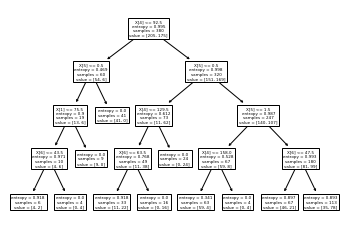

In [31]:
tree.plot_tree(model)